In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

data_path = "../data/raw/sales_raw.csv"
df = pd.read_csv(data_path)

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [2]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [3]:
df = df.rename(
    columns={
        "store_id": "store",
        "item_id": "item",
        "sales_value": "sales",
        "timestamp": "date",
    }
)


In [4]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["store", "item", "date"]).reset_index(drop=True)


In [5]:
df.isna().mean()  # percentage of missing values per column

df["store"].nunique(), df["item"].nunique(), df["date"].min(), df["date"].max()


(10, 50, Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

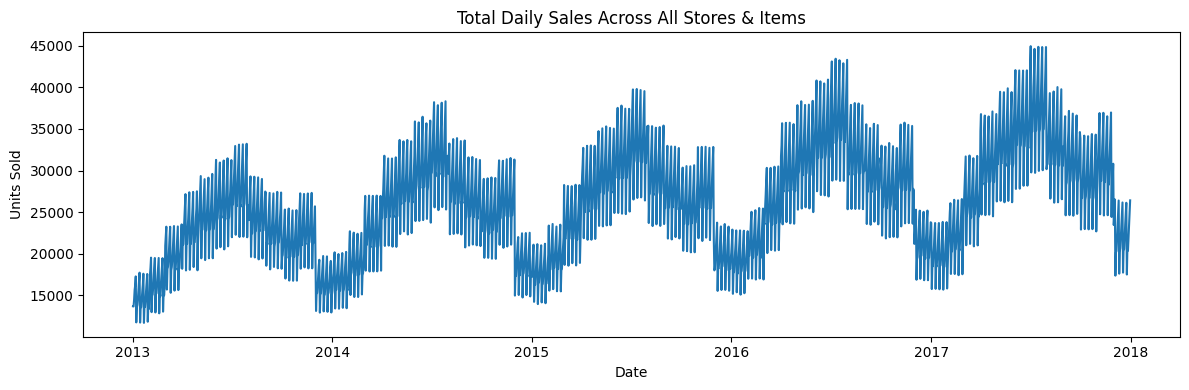

In [6]:
daily_sales = df.groupby("date")["sales"].sum().reset_index()

plt.figure(figsize=(12, 4))
plt.plot(daily_sales["date"], daily_sales["sales"])
plt.title("Total Daily Sales Across All Stores & Items")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


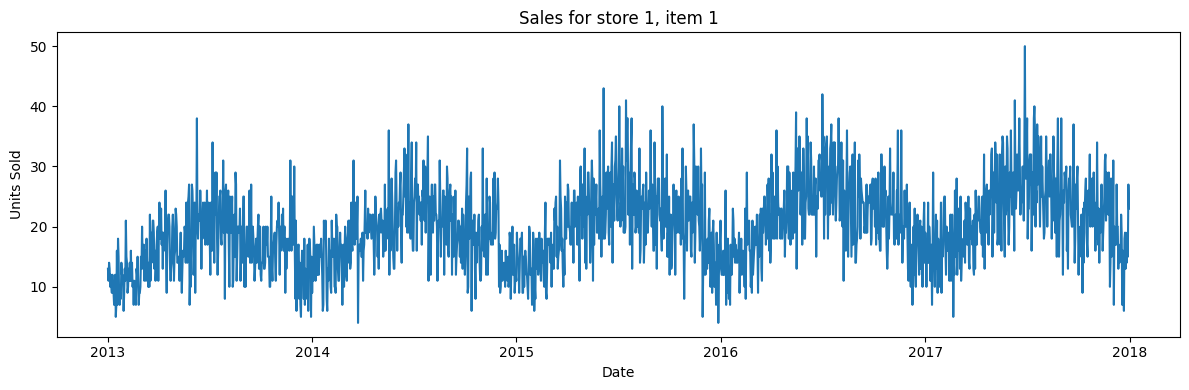

In [7]:
example = df[(df["store"] == df["store"].iloc[0]) & (df["item"] == df["item"].iloc[0])]

plt.figure(figsize=(12, 4))
plt.plot(example["date"], example["sales"])
plt.title(f"Sales for store {example['store'].iloc[0]}, item {example['item'].iloc[0]}")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


In [8]:
df = df.sort_values(["date"]).reset_index(drop=True)
df["time_idx"] = (df["date"] - df["date"].min()).dt.days


In [9]:
clean_path = "../data/processed/sales_clean.csv"
df.to_csv(clean_path, index=False)
clean_path

'../data/processed/sales_clean.csv'